<a href="https://colab.research.google.com/github/romanowiczadam/ml_course/blob/master/09_polynominal_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.22.2.post1'

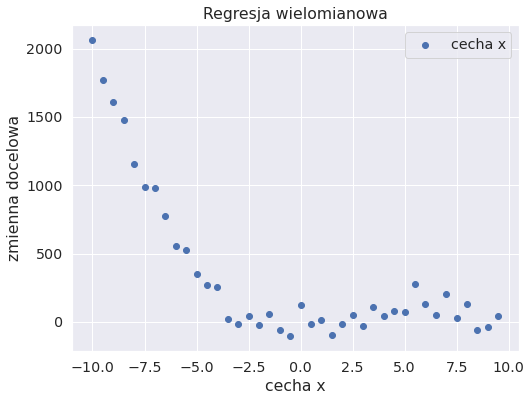

In [6]:
X = np.arange(-10, 10, 0.5)
noise = np.random.randn(40) * 80
y = -X**3 + 10*X**2 - 2*X + 3 + noise
X = X.reshape(40, 1)




plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.legend()
plt.show() 

[1030.826701  995.643745  960.460788  925.277832  890.094876  854.911919
  819.728963  784.546007  749.363051  714.180094  678.997138  643.814182
  608.631225  573.448269  538.265313  503.082356  467.8994    432.716444
  397.533487  362.350531  327.167575  291.984618  256.801662  221.618706
  186.43575   151.252793  116.069837   80.886881   45.703924   10.520968
  -24.661988  -59.844945  -95.027901 -130.210857 -165.393814 -200.57677
 -235.759726 -270.942683 -306.125639 -341.308595]


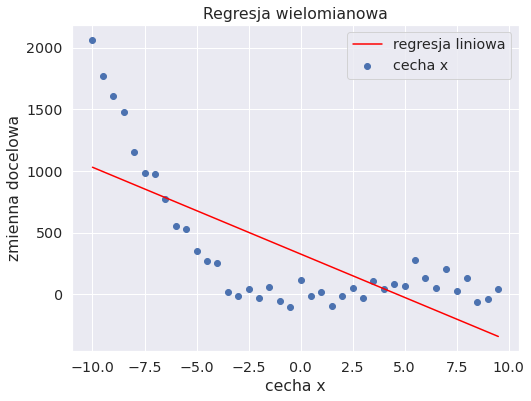

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
y_pred_lin = regressor.predict(X)
print(y_pred_lin)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_lin, c ='red', label='regresja liniowa')
plt.legend()
plt.show() 

In [8]:
from sklearn.metrics import r2_score

r2_score(y, y_pred_lin)

0.5342822962632471

In [9]:
# Ekstrakcja cech wielomianowych
df = pd.DataFrame(data={'X' : X.ravel()})
print(df)

       X
0  -10.0
1   -9.5
2   -9.0
3   -8.5
4   -8.0
5   -7.5
6   -7.0
7   -6.5
8   -6.0
9   -5.5
10  -5.0
11  -4.5
12  -4.0
13  -3.5
14  -3.0
15  -2.5
16  -2.0
17  -1.5
18  -1.0
19  -0.5
20   0.0
21   0.5
22   1.0
23   1.5
24   2.0
25   2.5
26   3.0
27   3.5
28   4.0
29   4.5
30   5.0
31   5.5
32   6.0
33   6.5
34   7.0
35   7.5
36   8.0
37   8.5
38   9.0
39   9.5


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_poly

array([[  1.  , -10.  , 100.  ],
       [  1.  ,  -9.5 ,  90.25],
       [  1.  ,  -9.  ,  81.  ],
       [  1.  ,  -8.5 ,  72.25],
       [  1.  ,  -8.  ,  64.  ],
       [  1.  ,  -7.5 ,  56.25],
       [  1.  ,  -7.  ,  49.  ],
       [  1.  ,  -6.5 ,  42.25],
       [  1.  ,  -6.  ,  36.  ],
       [  1.  ,  -5.5 ,  30.25],
       [  1.  ,  -5.  ,  25.  ],
       [  1.  ,  -4.5 ,  20.25],
       [  1.  ,  -4.  ,  16.  ],
       [  1.  ,  -3.5 ,  12.25],
       [  1.  ,  -3.  ,   9.  ],
       [  1.  ,  -2.5 ,   6.25],
       [  1.  ,  -2.  ,   4.  ],
       [  1.  ,  -1.5 ,   2.25],
       [  1.  ,  -1.  ,   1.  ],
       [  1.  ,  -0.5 ,   0.25],
       [  1.  ,   0.  ,   0.  ],
       [  1.  ,   0.5 ,   0.25],
       [  1.  ,   1.  ,   1.  ],
       [  1.  ,   1.5 ,   2.25],
       [  1.  ,   2.  ,   4.  ],
       [  1.  ,   2.5 ,   6.25],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   3.5 ,  12.25],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.5 ,  20.25],
       [  

In [11]:
df = pd.DataFrame(X_poly)
df.columns = ['1', 'x', 'x^2']
print(df)

      1     x     x^2
0   1.0 -10.0  100.00
1   1.0  -9.5   90.25
2   1.0  -9.0   81.00
3   1.0  -8.5   72.25
4   1.0  -8.0   64.00
5   1.0  -7.5   56.25
6   1.0  -7.0   49.00
7   1.0  -6.5   42.25
8   1.0  -6.0   36.00
9   1.0  -5.5   30.25
10  1.0  -5.0   25.00
11  1.0  -4.5   20.25
12  1.0  -4.0   16.00
13  1.0  -3.5   12.25
14  1.0  -3.0    9.00
15  1.0  -2.5    6.25
16  1.0  -2.0    4.00
17  1.0  -1.5    2.25
18  1.0  -1.0    1.00
19  1.0  -0.5    0.25
20  1.0   0.0    0.00
21  1.0   0.5    0.25
22  1.0   1.0    1.00
23  1.0   1.5    2.25
24  1.0   2.0    4.00
25  1.0   2.5    6.25
26  1.0   3.0    9.00
27  1.0   3.5   12.25
28  1.0   4.0   16.00
29  1.0   4.5   20.25
30  1.0   5.0   25.00
31  1.0   5.5   30.25
32  1.0   6.0   36.00
33  1.0   6.5   42.25
34  1.0   7.0   49.00
35  1.0   7.5   56.25
36  1.0   8.0   64.00
37  1.0   8.5   72.25
38  1.0   9.0   81.00
39  1.0   9.5   90.25


[1723.178468 1581.479856 1445.38733  1314.900892 1190.02054  1070.746276
  957.078099  849.016009  746.560007  649.710092  558.466263  472.828522
  392.796869  318.371302  249.551823  186.33843   128.731125   76.729907
   30.334777  -10.454267  -45.637223  -75.214092  -99.184874 -117.549569
 -130.308176 -137.460697 -139.00713  -134.947476 -125.281735 -110.009907
  -89.131991  -62.647988  -30.557898    7.138279   50.440543   99.348895
  153.863333  213.983859  279.710472  351.043172]


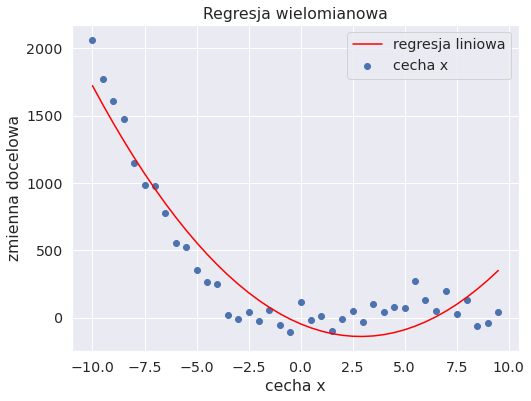

In [12]:
regressor_2 = LinearRegression()
regressor_2.fit(X_poly, y)
y_pred_poly = regressor_2.predict(X_poly)
print(y_pred_poly)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_poly, c ='red', label='regresja wielomianowa st 2')
plt.legend()
plt.show() 

In [13]:
r2_score(y, y_pred_poly)

0.8951163003458433

In [14]:
# stopnień trzeci
poly_3 = PolynomialFeatures(degree=3)

X_poly_3 = poly_3.fit_transform(X)
X_poly_3

array([[    1.   ,   -10.   ,   100.   , -1000.   ],
       [    1.   ,    -9.5  ,    90.25 ,  -857.375],
       [    1.   ,    -9.   ,    81.   ,  -729.   ],
       [    1.   ,    -8.5  ,    72.25 ,  -614.125],
       [    1.   ,    -8.   ,    64.   ,  -512.   ],
       [    1.   ,    -7.5  ,    56.25 ,  -421.875],
       [    1.   ,    -7.   ,    49.   ,  -343.   ],
       [    1.   ,    -6.5  ,    42.25 ,  -274.625],
       [    1.   ,    -6.   ,    36.   ,  -216.   ],
       [    1.   ,    -5.5  ,    30.25 ,  -166.375],
       [    1.   ,    -5.   ,    25.   ,  -125.   ],
       [    1.   ,    -4.5  ,    20.25 ,   -91.125],
       [    1.   ,    -4.   ,    16.   ,   -64.   ],
       [    1.   ,    -3.5  ,    12.25 ,   -42.875],
       [    1.   ,    -3.   ,     9.   ,   -27.   ],
       [    1.   ,    -2.5  ,     6.25 ,   -15.625],
       [    1.   ,    -2.   ,     4.   ,    -8.   ],
       [    1.   ,    -1.5  ,     2.25 ,    -3.375],
       [    1.   ,    -1.   ,     1.   ,    -1

[2100.691382 1842.83495  1605.868528 1388.965959 1191.301085 1012.047748
  850.379789  705.471051  576.495376  462.626605  363.038581  276.905145
  203.400139  141.697406   90.970788   50.394126   19.141262   -3.613961
  -18.697703  -26.93612   -29.15537   -26.181613  -18.841005   -7.959706
    5.636128   21.120338   37.666765   54.449253   70.641643   85.417776
   97.951496  107.416643  112.98706   113.836589  109.139071   98.06835
   79.798265   53.502661   18.355378  -26.469741]


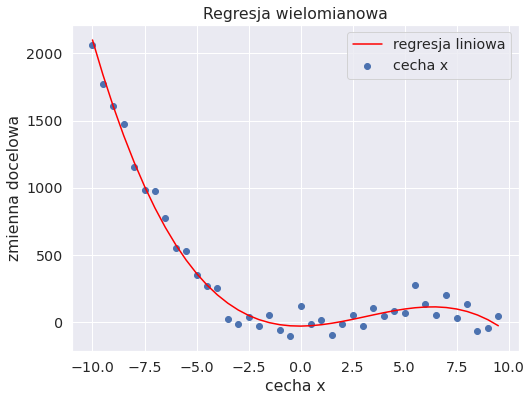

In [16]:
regressor_3 = LinearRegression()
regressor_3.fit(X_poly_3, y)
y_pred_poly_3 = regressor_3.predict(X_poly_3)
print(y_pred_poly_3)

plt.figure(figsize=(8, 6))
plt.title('Regresja wielomianowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(X, y, label='cecha x')
plt.plot(X, y_pred_poly_3, c ='red', label='regresja wielomianowa st 3')
plt.legend()
plt.show() 

In [17]:
r2_score(y, y_pred_poly_3)

0.9841708613657418

In [18]:
# IMPORT MAE I MSE
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [22]:
results = pd.DataFrame(data={
    'name' : ['reg_lin', 'reg_w_2', 'reg_w_3'],
    'r2_score' : [r2_score(y, y_pred_lin), r2_score(y, y_pred_poly), r2_score(y, y_pred_poly_3)],
    'mae' : [mae(y, y_pred_lin), mae(y, y_pred_poly), mae(y, y_pred_poly_3)],
    'mse' : [mse(y, y_pred_lin), mse(y, y_pred_poly), mse(y, y_pred_poly_3)],
    'smse' : [np.sqrt(mse(y, y_pred_lin)), np.sqrt(mse(y, y_pred_poly)), np.sqrt(mse(y, y_pred_poly_3))]
})
print(results)

      name  r2_score         mae            mse        smse
0  reg_lin  0.534282  316.267126  143775.153332  379.176942
1  reg_w_2  0.895116  155.977929   32379.421866  179.942829
2  reg_w_3  0.984171   57.572030    4886.730343   69.905152
